In [2]:
# define a function for the feedforward propagation
import numpy as np

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    sigmoid_func =  1/(1+np.exp(-pre_hidden))
    pred_output = np.dot(sigmoid_func, weights[2]) + weights[3]
    mse = np.mean(np.square(outputs - pred_output))
    return mse

In [3]:
from copy import deepcopy
# Define a function for backpropagation

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/ (0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [4]:
# build a simple neural network
x = np.array([1,1])
y = np.array([0])

In [5]:
# prepare the random weights to start with
W = [
    np.array([[-0.0053, 0.3233],
              [-0.4534, -0.43454],
              [-0.000343, 0.3343]], dtype=np.float32).T,
    np.array([-0.0234, 0.44343, -0.05454], dtype=np.float32),
    np.array([0.2324, -0.1192, -0.43567], dtype=np.float32).T,
    np.array([-0.5433], dtype=np.float32)
]

In [6]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W, 0.01)
    losses.append(loss)

Text(0, 0.5, 'Loss')

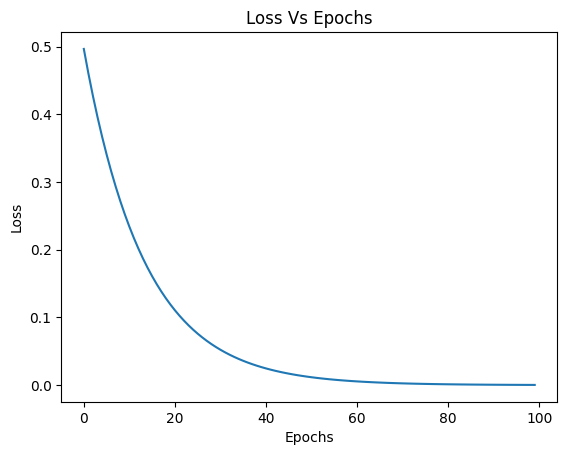

In [8]:
# plot the loss graph
from matplotlib import pyplot as plt
plt.plot(losses)
plt.title("Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")